## Perform clinphen

1. added new lemmatising options: 
    - tic -> ia or y  (e.g. dysplastic -> dysplasia)
    - ce -> t (e.g. absence -> absent)

## import data

In [1]:
import pandas as pd
import sys
sys.path.append('../')

df_train = pd.read_csv('../data/Bio-Lark/df_train.csv')
df_test = pd.read_csv('../data/Bio-Lark/df_test.csv')
df_valid = pd.read_csv('../data/Bio-Lark/df_valid.csv')

df_train.head()

,entID,docID,start,end,hpo,entity,text
0,12,1,35,53,HP_0000006,autosomal dominant,Townes-Brocks syndrome (TBS) is an autosomal d...
1,13,1,95,114,HP_0003828,variable expression,Townes-Brocks syndrome (TBS) is an autosomal d...
2,14,1,139,161,HP_0000356,external ear anomalies,Townes-Brocks syndrome (TBS) is an autosomal d...
3,15,1,163,175,HP_0000365,hearing loss,Townes-Brocks syndrome (TBS) is an autosomal d...
4,16,1,177,197,HP_0001841,preaxial polydactyly,Townes-Brocks syndrome (TBS) is an autosomal d...


### format trainingsdata -> to format usable for clinphen

In [141]:
df_train[df_train['docID']==7].replace(r'\n',' ', regex=True)['text'].iloc[0]

"Neurofibromatosis type 2 (NF2) is a highly penetrant autosomal dominant condition predisposing affected individuals to schwannomas and meningiomas. The proportion of children presenting with meningioma or schwannoma who have NF2 is not well described, and neither is the mode of presentation in most children with the inherited disease.  To determine the frequency of childhood meningioma and schwannoma cases caused by NF2 and the mode of presentation.  The records of the Manchester Children's Tumour Registry from 1954 were searched for cases of meningioma and schwannoma. Paediatric presentation in a large UK series of NF2 was also studied.  18% (61/334) of patients with NF2 on the UK database presented in the paediatric age group (0-15 years), frequently with the symptoms of an isolated tumour. More than half had no family history to alert the clinician to their susceptibility. Three of 22 children presenting with a meningioma on the Manchester Children's Tumour Registry have gone on to

In [134]:
df_train.replace('\n', '\t')

,entID,docID,start,end,hpo,entity,text
0,12,1,35,53,HP_0000006,autosomal dominant,Townes-Brocks syndrome (TBS) is an autosomal d...
1,13,1,95,114,HP_0003828,variable expression,Townes-Brocks syndrome (TBS) is an autosomal d...
2,14,1,139,161,HP_0000356,external ear anomalies,Townes-Brocks syndrome (TBS) is an autosomal d...
3,15,1,163,175,HP_0000365,hearing loss,Townes-Brocks syndrome (TBS) is an autosomal d...
4,16,1,177,197,HP_0001841,preaxial polydactyly,Townes-Brocks syndrome (TBS) is an autosomal d...
...,...,...,...,...,...,...,...
634,1912,225,705,726,HP_0002671,basal cell carcinomas,Mutations of the human Patched gene ( PTCH ) h...
635,1913,225,734,750,HP_0002885,medulloblastomas,Mutations of the human Patched gene ( PTCH ) h...
636,1914,225,809,824,HP_0002885,medulloblastoma,Mutations of the human Patched gene ( PTCH ) h...
637,1915,225,866,886,HP_0002671,basal cell carcinoma,Mutations of the human Patched gene ( PTCH ) h...


In [143]:
df_train.drop_duplicates(subset=['text'])[['docID', 'text']].rename(columns={'docID':'"MRN"','text':'"NOTE"'}).replace(r'\n',' ', regex=True).to_csv(r'data/df_train_bulk.txt', sep='|', index=False, quotechar="'") # quotechar

## employ clinphen

In [144]:
# df_train_bulk.txt
!C:/Users/levrex/Anaconda3/envs/my_env/Scripts/clinphen_bulk.py data/df_train_bulk.txt df_anno.txt2
    
#df_train_bulk.txt df_anno.txt 
#raw_output = !C:/Users/levrex/Anaconda3/envs/my_env/Scripts/clinphen.py example_data.txt 
    
#df_anno.txt 

Het systeem kan het opgegeven pad niet vinden.
2020-08-24 12:33:33 INFO     Processing notes with 6 threads


C:\Users\levrex\Anaconda3\envs\my_env\lib\site-packages\clinphen_src\data\hpo_synonyms.txt
[{'', 'a', 'to', 'addition', 'craniofacial', 'in'}, {'', 'auricular', 'a'}, {'', 'a', 'ophthalmology', 'ophthalmologia', 'ophthalmologic'}, {'and'}, {'', 'anomaliis', 'a', 'anomaly', 'abnormal', 'anomalies', 'unusual', 'anomali', 'disorder', 'problem', 'abnormality', 'atypical', 'oral', 'anomalie'}, {'', 'a', 'phenotype', 'includes', 'infra', 'defects', 'oculi', 'the', 'infron', 'includis', '113620', 'of', 'neck', 'mim', 'or', 'bof', 'branchio', 'auricular', 'infrum', 'syndrome', 'branch', 'skin', 'include', 'includ', 'facial', 'supra', 'supron', 'suprum', 'region', 'distinctive', 'defect', 'oculo', 'in'}, {'areas', '', 'a', 'anomaly', 'abnormal', 'area', 'thin', 'anomalies', 'unusual', 'disorder', 'these', 'problem', 'abnormality', 'of', 'atypical'}, {'', 'a', 'erythematou', 'skin', 'differ', 'wrinkled', 'wrinkl', 'discrete', 'erythematous', 'the', 'cervical', 'from', 'pit', 'pits'}, {'', 'cyst'

[{'', 'brock', 'townis', 'brocks', 'towns', 'defect', 'towne', 'syndrome', 'of', 'town', 'case', 'author', 'authors', 'the', 'new', 'a', 'townes', 'report', 'with', 'cardiac', 'rocks'}, {'anomaliis', 'anomalies', 'abnormal', 'anomalie', 'problem', 'ossicular', 'anomali', 'abnormality', 'atypical', 'unusual', 'and', 'anomaly', 'disorder'}, {'', 'dominant', 'a', 'transmission'}, {'variable', 'and', 'the', 'intrafamilial', 'of', 'phenotype', 'variability'}, {'', 'lacking', 'difficulty', 'impairment', 'cases', 'in', 'diagnosi', 'casis', 'of', 'diagnosis', 'underlin', 'decreased', 'deficits', 'impair', 'the', 'a', 'insufficient', 'lack', 'low', 'trouble', 'isolated', 'reduced', 'deficiency', 'cas', 'reduce', 'deficit', 'are', 'decrease', 'difficulties', 'underlined', 'deficient', 'isolat', 'case', 'impaired'}]
[{'lymphocytes', 'lymphocyte', 'neurofibromatosi', 'c', 'hybridization', 'in', 'lymphocytis', 'on', 'perform', 'of', 'performed', 'peripheral', 'man', 'was', 'wa', 'sis', 'and', 'a', 

In [9]:
print(raw_output)

['Het systeem kan het opgegeven pad niet vinden.', 'C:\\Users\\levrex\\Anaconda3\\envs\\my_env\\lib\\site-packages\\clinphen_src\\data\\hpo_synonyms.txt', 'usage: clinphen_bulk.py [-h] [--delim DELIM] [--patcol PATCOL]', '                        [--notecol NOTECOL] [--noheader]', '                        [--thesaurus THESAURUS] [--threads THREADS]', '                        recordfile outfile', '', 'ClinPhen commandline.', '', 'positional arguments:', '  recordfile            Tabular file containing records to parse', '  outfile               Output tsv file', '', 'optional arguments:', '  -h, --help            show this help message and exit', '  --delim DELIM         Delimiter in recordfile (default: |)', '  --patcol PATCOL       Column for patient identifiers. Should be integer if', '                        recordfile has no header (default: MRN)', '  --notecol NOTECOL     Column for notes. Should be integer if recordfile has', '                        no header (default: NOTE)', ' 

## Read Annotations

In [2]:
import pandas as pd
#import StringIO
df_anno = pd.read_csv('df_anno.txt2', sep='\t')
df_anno.head()

,#Patient ID,HPO ID,Phenotype name,No. occurrences,Earliness (lower = earlier)
0,1,HP:0000006,Autosomal dominant inheritance,1,0
1,1,HP:0000356,Abnormality of the outer ear,1,2
2,1,HP:0000598,Abnormality of the ear,1,2
3,1,HP:0000365,Hearing impairment,1,3
4,1,HP:0010442,Polydactyly,1,4


In [3]:
df_anno['#Patient ID'].unique()

array([  1, 102, 105,  11, 110, 115, 116,  12, 121, 128,  13, 130, 131,
       134, 136, 141, 145, 151, 152, 160, 166, 171, 172, 175, 176, 179,
       181, 183, 187, 188, 189, 190, 191, 194, 198, 204, 205, 208, 209,
        21, 210, 218, 219, 225,  28,   3,  31,  32,  34,  39,  41,  42,
        44,  53,  57,  58,   6,  61,  64,   7,  71,  72,  76,  78,  80,
        83,  87,  88,  91,  92,  94,  98], dtype=int64)

In [3]:
#raw_output = !C:/Users/levrex/Anaconda3/envs/my_env/Scripts/clinphen.py example_data.txt 
#import pandas as pd

#cols=['HPO ID', 'Phenotype name', 'No. occurrences', 'Earliness (lower = earlier)', 'Example sentence']
#df_clinphen = pd.DataFrame(columns=cols) 
#for i in range(len(raw_output)):
#    if '\t' in raw_output[i]:
#        line = raw_output[i].split('\t')
#        if line != cols:
#            df_clinphen.loc[i] = line
#df_clinphen.head()

In [4]:
#print(raw_output)

In [6]:
#df_text = pd.read_csv(r'../data/Bio-Lark/df_text.csv')
#df_anno = pd.read_csv(r'../data/Bio-Lark/df_anno.csv')
#df_total = pd.DataFrame(columns=['docID', 'found_hpo', 'true_hpo']) 

## Evaluate ClinPhen

ToDo: 
Update deprecated HPO

In [4]:
import networkx
import obonet
import pandas as pd

#%%time
url = '../phenopy_mod/.phenopy/data/hp.obo'
graph = obonet.read_obo(url)

#id_to_name = {id_: data.get('name') for id_, data in graph.nodes(data=True)}
#name_to_id = {data['name']: id_ for id_, data in graph.nodes(data=True) if 'name' in data}

In [7]:
import DeepPhenotyping_functions as func

#inferred = df_anno[df_anno['#Patient ID']==doc_id]['HPO ID'].unique()
d_trans= func.generate_hpo_updgrade_list(graph)

FN:  4
FP:  3
1 9 10
FN:  1
FP:  3
3 4 2
FN:  2
FP:  0
4 0 2
FN:  1
FP:  8
6 17 10
FN:  2
FP:  0
7 5 8
FN:  15
FP:  2
11 2 15
FN:  1
FP:  2
12 7 7
FN:  0
FP:  1
13 4 3
FN:  2
FP:  0
21 2 4
FN:  2
FP:  2
28 3 3
FN:  2
FP:  0
31 1 3
FN:  1
FP:  4
32 11 8
FN:  1
FP:  2
34 4 3
FN:  4
FP:  5
39 13 12
FN:  2
FP:  0
41 2 4
FN:  7
FP:  4
42 8 11
FN:  3
FP:  1
44 5 7
FN:  2
FP:  0
52 0 2
FN:  4
FP:  5
53 12 11
FN:  0
FP:  3
57 7 4
FN:  3
FP:  7
58 10 6
FN:  2
FP:  1
61 10 11
FN:  0
FP:  0
64 1 1
FN:  0
FP:  0
71 1 1
FN:  1
FP:  1
72 1 1
FN:  3
FP:  4
76 9 8
FN:  4
FP:  3
78 6 7
FN:  1
FP:  1
80 2 2
FN:  1
FP:  0
81 0 1
FN:  2
FP:  3
83 9 8
FN:  7
FP:  3
87 11 15
FN:  2
FP:  4
88 6 4
FN:  3
FP:  4
91 6 5
FN:  5
FP:  3
92 14 17
FN:  0
FP:  1
94 4 3
FN:  1
FP:  5
98 12 9
FN:  1
FP:  0
102 1 2
FN:  4
FP:  0
105 2 6
FN:  0
FP:  1
110 6 5
FN:  0
FP:  0
115 1 1
FN:  2
FP:  2
116 5 5
FN:  2
FP:  3
121 5 4
FN:  1
FP:  0
122 0 1
FN:  6
FP:  5
128 9 10
FN:  5
FP:  2
130 5 8
FN:  1
FP:  1
131 3 3
FN:  4
FP

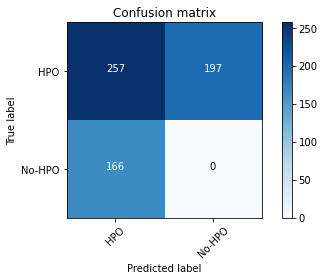

In [8]:
import numpy as np

y_test = []
y_pred = []

# set1 - set2 & set2 - set1
TP = 0 
TN = 0
FP = 0
FN = 0

for doc_id in list(df_train['docID'].unique()):
    inferred = df_anno[df_anno['#Patient ID']==doc_id]['HPO ID'].unique()
    gold = df_train[df_train['docID']==doc_id]['hpo'].unique()
    gold = [i.replace('_', ':') for i in gold]
    gold = func.update_deprecated_OBO(list(gold), d_trans)
    #gold = in_hpo(list(gold), list(id_to_name.keys()))
    #break
    TP += len(np.intersect1d(list(set(gold)), list(set(inferred))))
    FN += len(set(gold) - set(inferred))
    FP +=  len(set(inferred) - set(gold))
    
    for i in range(len(np.intersect1d(list(set(gold)), list(set(inferred))))):
        y_test.append(1)
        y_pred.append(1)
    for i in range(len(set(gold) - set(inferred))):
        y_test.append(1)
        y_pred.append(0)
    for i in range(len(set(inferred) - set(gold))):
        y_test.append(0)
        y_pred.append(1)
    #print('TP: ', len(np.intersect1d(list(set(gold)), list(set(inferred)))))
    print('FN: ', len(set(gold) - set(inferred)))
    print('FP: ', len(set(inferred) - set(gold)))
    print(doc_id, len(inferred), len(gold))
    y_pred.append(0)
    y_test.append(0)
    
cnf_matrix = np.array([[TP, FN], [FP, TN]])

plt = func.print_confusion_matrix(cnf_matrix, classes=['HPO', 'No-HPO'], title='Confusion matrix')

## Calculate spec, sens, ppv

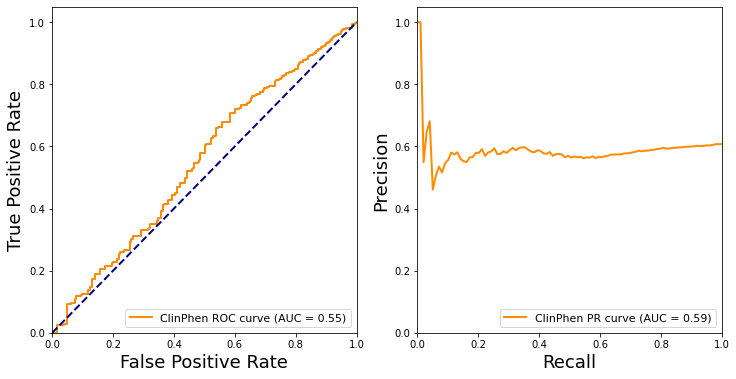

In [9]:
#neurodevelopmental disorder
#Neurologic abnormalities
import importlib as imp

imp.reload(func)

func.plot_performance(y_pred,y_test, clf_name='ClinPhen')

In [10]:
func.print_perf(TP, FP, TN, FN)

Sensitivity:	 0.57
Specificity:	 0.0
PPV:		 0.61
NPV:		 0.0
F1:		 0.59
Accuracy:	 0.41


In [155]:
df_train[df_train['docID']==191]

,entID,docID,start,end,hpo,entity,text
531,1588,191,82,112,HP_0004378,"anal, thumb, and ear anomalies",The Townes-Brocks syndrome (TBS) is comprised ...
532,1589,191,88,112,HP_0001172,"thumb, and ear anomalies",The Townes-Brocks syndrome (TBS) is comprised ...
533,1590,191,99,112,HP_0000598,ear anomalies,The Townes-Brocks syndrome (TBS) is comprised ...
534,1591,191,135,161,HP_0000118,organ system abnormalities,The Townes-Brocks syndrome (TBS) is comprised ...
535,1592,191,227,248,HP_0000271,craniofacial findings,The Townes-Brocks syndrome (TBS) is comprised ...
536,1593,191,227,248,HP_0002260,craniofacial findings,The Townes-Brocks syndrome (TBS) is comprised ...
537,1594,191,278,303,HP_0000598,typical ear configuration,The Townes-Brocks syndrome (TBS) is comprised ...
538,1595,191,353,380,HP_0000271,craniofacial manifestations,The Townes-Brocks syndrome (TBS) is comprised ...
539,1596,191,353,380,HP_0002260,craniofacial manifestations,The Townes-Brocks syndrome (TBS) is comprised ...
540,1597,191,534,550,HP_0002023,imperforate anus,The Townes-Brocks syndrome (TBS) is comprised ...


In [156]:
## HP:0012825, HP:0012828

In [157]:
df_anno[df_anno['#Patient ID']==191]

,#Patient ID,HPO ID,Phenotype name,No. occurrences,Earliness (lower = earlier)
156,191,HP:0000356,Abnormality of the outer ear,1,3
157,191,HP:0000598,Abnormality of the ear,1,3
158,191,HP:0000118,Phenotypic abnormality,1,4
159,191,HP:0002023,Anal atresia,1,11
160,191,HP:0001140,Limbal dermoid,1,14
161,191,HP:0011332,Hemifacial hypoplasia,1,15
162,191,HP:0000384,Preauricular skin tag,1,16
163,191,HP:0000154,Wide mouth,1,17
164,191,HP:0000347,Micrognathia,1,19


In [158]:
# Neurologic abnormalities
# Neurodevelopmental - Neurologic 
# abnormalities - disorder
# disposition - aspect (happy disposition)
df_train[df_train['docID']==191]['text'].iloc[0]

'The Townes-Brocks syndrome (TBS) is comprised of a triad including characteristic anal, thumb, and ear anomalies. There are many other organ system abnormalities which may be present. However, the literature does not emphasize craniofacial findings except with reference to the typical ear configuration. A three-generation family is described in which craniofacial manifestations were prominent and a Goldenhar-like condition was considered as the most likely diagnosis. However, with the recent birth of an affected male who had an imperforate anus, the diagnosis of TBS was also considered. The family manifests a variety of Goldenhar-like findings, including epibulbar dermoids, hemifacial microsomia, preauricular tags, macrostomia, and micrognathia in addition to classical ear, radial, and anal findings of TBS. We report on this family to point out a possible biological relationship of these two conditions.'

In [89]:
set(list(df_anno[df_anno['docID']==0]['hpo'].unique())) - set(list(df_clinphen['HPO ID'].unique()))

{'HP_0000006',
 'HP_0001156',
 'HP_0001363',
 'HP_0001385',
 'HP_0001792',
 'HP_0001798',
 'HP_0008090',
 'HP_0008368',
 'HP_0009702',
 'HP_0009881',
 'HP_0010239',
 'HP_0100264'}

In [39]:
set(list(df_anno[df_anno['docID']==0]['hpo'].unique()))

{'HP_0001156 '}

In [51]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['something', 'is', 'hapenning', 'here'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

happening
{'happening', 'henning', 'penning'}


In [52]:
from spellchecker import SpellChecker

spell = SpellChecker()

# find those words that may be misspelled
misspelled = spell.unknown(['ankylois'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

ankylois
{'ankylois'}


## Typo Correction

In [64]:
import pickle 
spell = SpellChecker()
spell.word_frequency.load_text_file('data/HPO_vocab.csv')
spell.word_frequency.load_text_file('data/hpo_synonyms.txt')

pickle.dump(spell, open( "spellCheckerHPO.p", "wb" ))

In [65]:
spell = pickle.load(open( "spellCheckerHPO.p", "rb" ))

In [71]:
# find those words that may be misspelled
misspelled = spell.unknown(['this', 'is', 'a', 'test', 'do', 'you', 'know', 'that', 'ankylois', 'piraat', '?'])

for word in misspelled:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

pirate
{'pratt', 'praag', 'piracy', 'piat', 'prat', 'pirate', 'pira', 'piran', 'rifaat', 'pialat'}
ankylosis
{'ankylosis'}


In [83]:
word = 'test2'
if spell.unknown([word]) != {}:
    print(spell.correction(word))

test


## 2. Employ on validation set

In [ ]:
# df_valid

# make two sets

In [37]:
df_valid.head()

,entID,docID,start,end,hpo,entity,text
0,0,0,14,27,HP_0001156,brachydactyly,A syndrome of brachydactyly (absence of some m...
1,1,0,29,71,HP_0009881,absence of some middle or distal phalanges,A syndrome of brachydactyly (absence of some m...
2,2,0,29,71,HP_0010239,absence of some middle or distal phalanges,A syndrome of brachydactyly (absence of some m...
3,3,0,74,103,HP_0001798,aplastic or hypoplastic nails,A syndrome of brachydactyly (absence of some m...
4,4,0,86,103,HP_0001792,hypoplastic nails,A syndrome of brachydactyly (absence of some m...
